In [ ]:
pip install openpyxl


In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [159]:
df=pd.read_excel("C:/Users/hp/Documents/Warehouse&BI/projet_data_mining/Classeur1.xlsm")
print(df.isnull().sum())


age                   1515
sexe                   945
taux                  1015
situationFamiliale    1045
nbEnfantsAcharge      1000
2eme voiture          1100
immatriculation          0
categorie                0
dtype: int64


In [160]:
print(df.dtypes)


age                   float64
sexe                   object
taux                   object
situationFamiliale     object
nbEnfantsAcharge      float64
2eme voiture          float64
immatriculation        object
categorie              object
dtype: object


In [161]:
df['taux'] = pd.to_numeric(df['taux'], errors='coerce')
df['sexe'] = df['sexe'].fillna(df['sexe'].mode()[0])
df['2eme voiture'] = df['2eme voiture'].fillna(df['2eme voiture'].mode()[0])
df['situationFamiliale'] = df['situationFamiliale'].fillna(df['situationFamiliale'].mode()[0])
df['age'] = df['age'].fillna(df['age'].median())
df['taux'] = df['taux'].fillna(df['taux'].median())
df['nbEnfantsAcharge'] = df['nbEnfantsAcharge'].fillna(df['nbEnfantsAcharge'].median())

In [162]:
print(df.isnull().sum())

age                   0
sexe                  0
taux                  0
situationFamiliale    0
nbEnfantsAcharge      0
2eme voiture          0
immatriculation       0
categorie             0
dtype: int64



Rapport de classification :
                     precision    recall  f1-score   support

Berlines familiales       1.00      0.96      0.98    113273
  Grands monospaces       0.95      0.99      0.97     26877
   Voitures premium       0.75      0.99      0.85      9850

           accuracy                           0.97    150000
          macro avg       0.90      0.98      0.93    150000
       weighted avg       0.97      0.97      0.97    150000


Accuracy: 0.97

Importance des caractéristiques :
                          feature  importance
1                            taux    0.457014
2                nbEnfantsAcharge    0.183794
0                             age    0.125100
9                2eme voiture_1.0    0.117078
5  situationFamiliale_Célibataire    0.066595
7    situationFamiliale_En Couple    0.048162
8     situationFamiliale_Marié(e)    0.000736
4                          sexe_M    0.000718
3                          sexe_F    0.000717
6     situationFamiliale_Divor

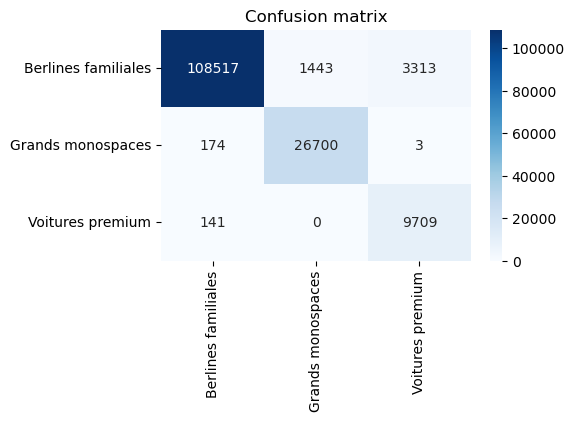

✅ Pipeline saved as 'marketing_pipeline.joblib'


In [163]:
# 2. Sélection des features et vérification
features = ['age', 'taux', 'nbEnfantsAcharge', 'sexe','situationFamiliale','2eme voiture']
target = 'categorie'
X = df[features]
y = df[target]
# 3. Diviser les colonnes numériques / catégorielles
numeric_features = ['age', 'taux', 'nbEnfantsAcharge']
categorical_features = ['sexe','situationFamiliale','2eme voiture']
# 4. Création du préprocesseur
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')
preprocessor = ColumnTransformer(
    transformers=[ ('num', numeric_transformer, numeric_features), ('cat', categorical_transformer, categorical_features)])
# 4. Division des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# 5. Modèle Random Forest optimisé
rf_model = RandomForestClassifier(n_estimators=100,max_depth=30,min_samples_split=2,max_features='sqrt',class_weight='balanced',random_state=42)
# 6. Pipeline complet
pipeline = Pipeline(steps=[('preprocessor', preprocessor),('classifier', rf_model)])
# 8. Entraînement
pipeline.fit(X_train, y_train)

# 9. Prédiction & évaluation
y_pred = pipeline.predict(X_test)
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))
print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.2f}")

# 10. Importance des variables
importances = pipeline.named_steps['classifier'].feature_importances_
feature_names = numeric_features + list( pipeline.named_steps['preprocessor'] .named_transformers_['cat']
    .get_feature_names_out(categorical_features))

importances_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
importances_df = importances_df.sort_values(by='importance', ascending=False)

print("\nImportance des caractéristiques :")
print(importances_df)

cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,3))
sns.heatmap(cm,fmt='d',annot=True,xticklabels=rf_model.classes_,yticklabels=rf_model.classes_,cmap='Blues')
plt.title('Confusion matrix')
plt.show()


from joblib import dump

# Save the entire pipeline (preprocessor + trained model) to a file
dump(pipeline, 'marketing_pipeline.joblib')

print("✅ Pipeline saved as 'marketing_pipeline.joblib'")

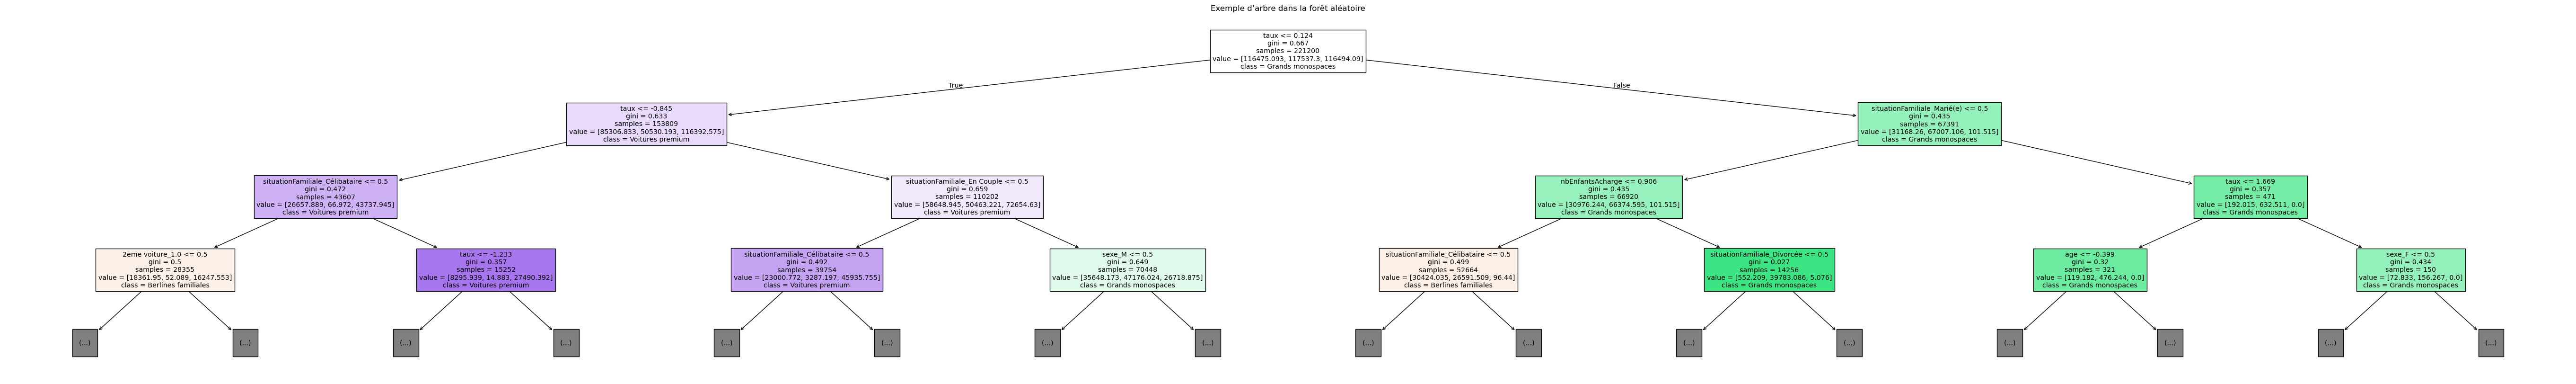

In [151]:
# 11. Visualisation d'un arbre
plt.figure(figsize=(70, 10))
plot_tree(pipeline.named_steps['classifier'].estimators_[0],
          feature_names=feature_names,
          class_names=rf_model.classes_,
          filled=True,
          max_depth=3)
plt.title("Exemple d’arbre dans la forêt aléatoire")
plt.show()

In [153]:
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1. Charger les données clients
df = pd.read_csv("C:/Users/hp/Documents/Warehouse&BI/projet_data_mining/Marketing.csv", encoding="latin1")

# 2. Définir les colonnes d'entrée
numeric_features = ['age', 'taux', 'nbEnfantsAcharge']
categorical_features = ['sexe', 'situationFamiliale', '2eme voiture']

X = df  # Tout le DataFrame

# 3. Charger le modèle déjà entraîné (ex: RandomForestClassifier)
model=joblib.load('marketing_pipeline.joblib')

# 5. Prédire directement (sans fit !)
df['categorieVehicule_predite'] =model.predict(X)
y=df['categorieVehicule_predite']
# 6. Enregistrer les résultats
df.to_csv("Marketing_resultats.csv", index=False)
print("✅ Prédictions enregistrées dans Marketing_resultats.csv")


✅ Prédictions enregistrées dans Marketing_resultats.csv


In [1]:
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1. Charger les données clients
df = pd.read_csv("C:/Users/hp/Documents/Warehouse&BI/projet_data_mining/Marketing.csv", encoding="latin1")

# 2. Définir les colonnes d'entrée
numeric_features = ['age', 'taux', 'nbEnfantsAcharge']
categorical_features = ['sexe', 'situationFamiliale', '2eme voiture']

X = df  # Tout le DataFrame

# 3. Charger le modèle déjà entraîné (ex: RandomForestClassifier)
model=joblib.load('marketing_pipeline.joblib')

# 5. Prédire directement (sans fit !)
df['categorieVehicule_predite'] =model.predict(X)
y=df['categorieVehicule_predite']
# 6. Enregistrer les résultats
df.to_csv("Marketing_resultats.csv", index=False)
print("✅ Prédictions enregistrées dans Marketing_resultats.csv")








✅ Prédictions enregistrées dans Marketing_resultats.csv
